In [297]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [298]:
#load training and testing data
ds_train=pd.read_excel("Data_Train.xlsx")
ds_test=pd.read_excel("Test_Set.xlsx")

In [299]:
ds_train.shape

(10683, 11)

training data set have 10683 rows and 11 columns

In [300]:
ds_test.shape

(2671, 10)

testing data have 2671 rows and 10 columns

In [301]:
ds_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [302]:
ds_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [303]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [304]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Checking data type

In [305]:
ds_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

training data set have input features of object type and target variable is int type

In [306]:
ds_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

testing data have input features of object data type

Checking missing values of training data and testing data

In [307]:
ds_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

training data set have some missing values

In [308]:
ds_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

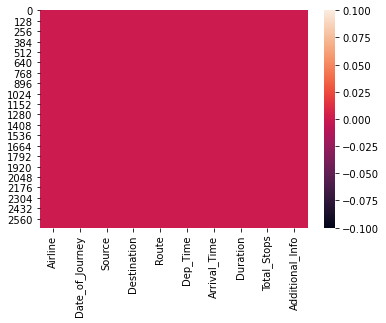

In [309]:
sns.heatmap(ds_test.isnull())

<AxesSubplot:>

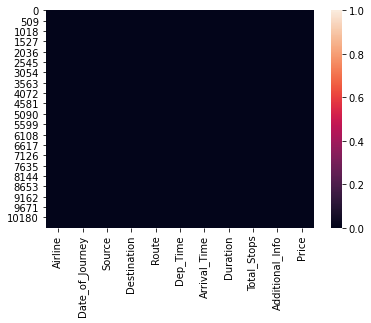

In [310]:
sns.heatmap(ds_train.isnull())

In [311]:
#fill total stop missing values
ds_train['Total_Stops']=ds_train['Total_Stops'].fillna(ds_train['Total_Stops'].mode()[0])

Visualazation of categorical data

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


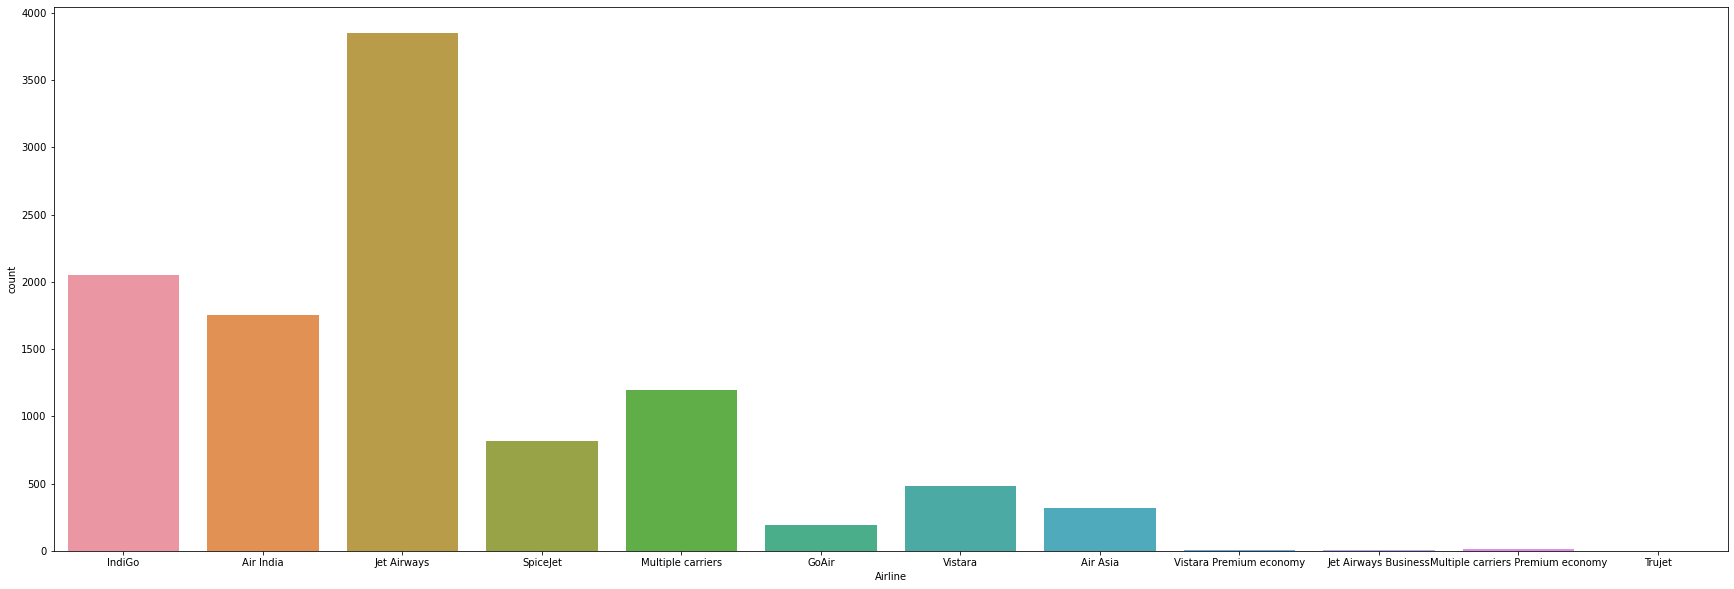

In [312]:
#below countplot shows that there are different airline companies
plt.figure(figsize=(30,10))
sns.countplot(ds_train['Airline'])
print(ds_train['Airline'].value_counts())

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


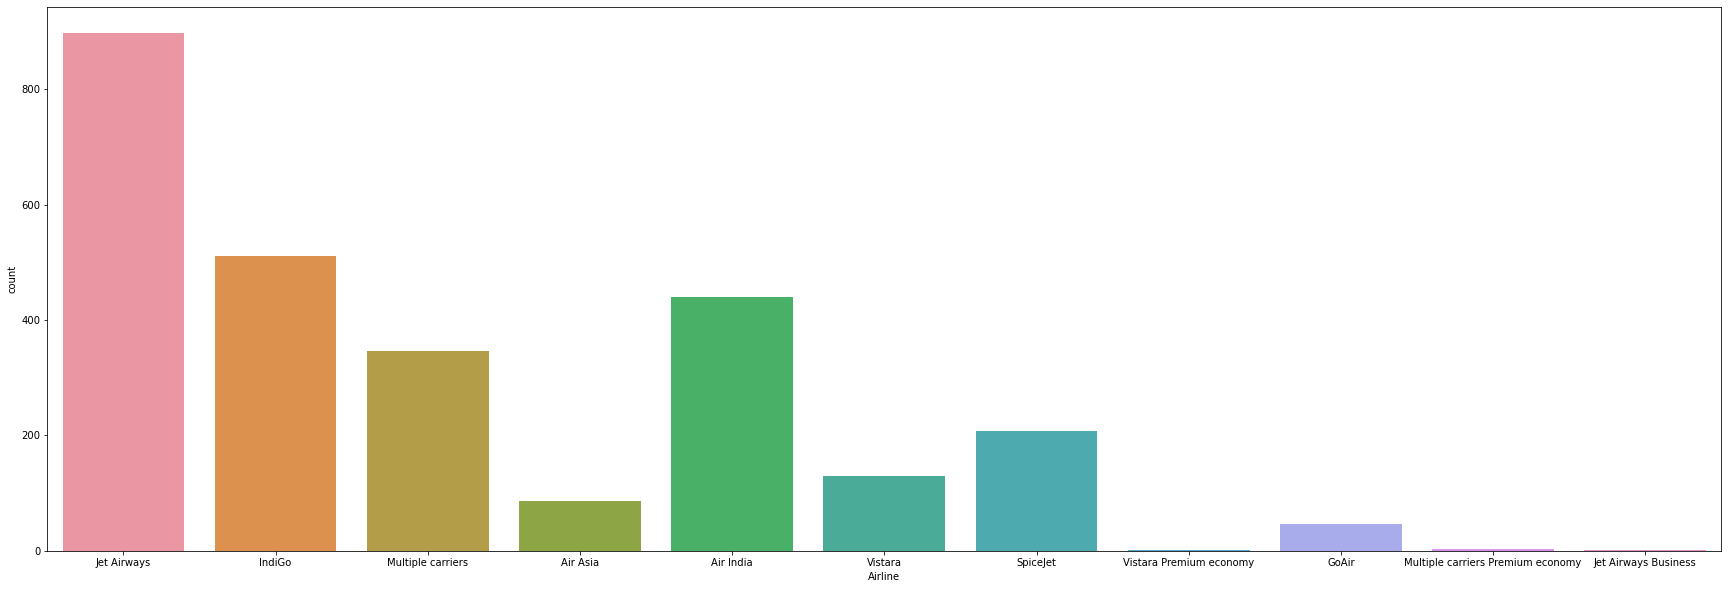

In [313]:
plt.figure(figsize=(30,10))
sns.countplot(ds_test['Airline'])
print(ds_test['Airline'].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


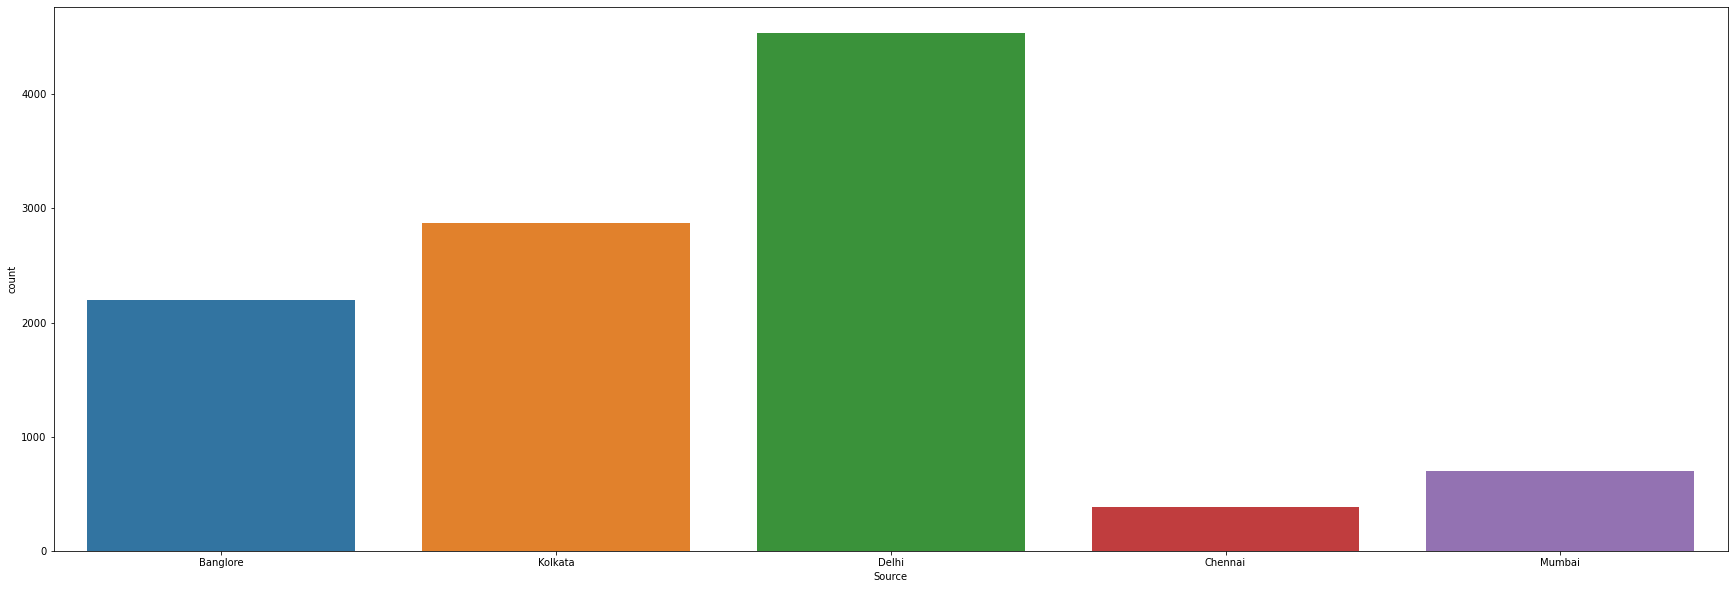

In [314]:
#below countplot shows the source of flight 
plt.figure(figsize=(30,10))
sns.countplot(ds_train['Source'])
print(ds_train['Source'].value_counts())

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


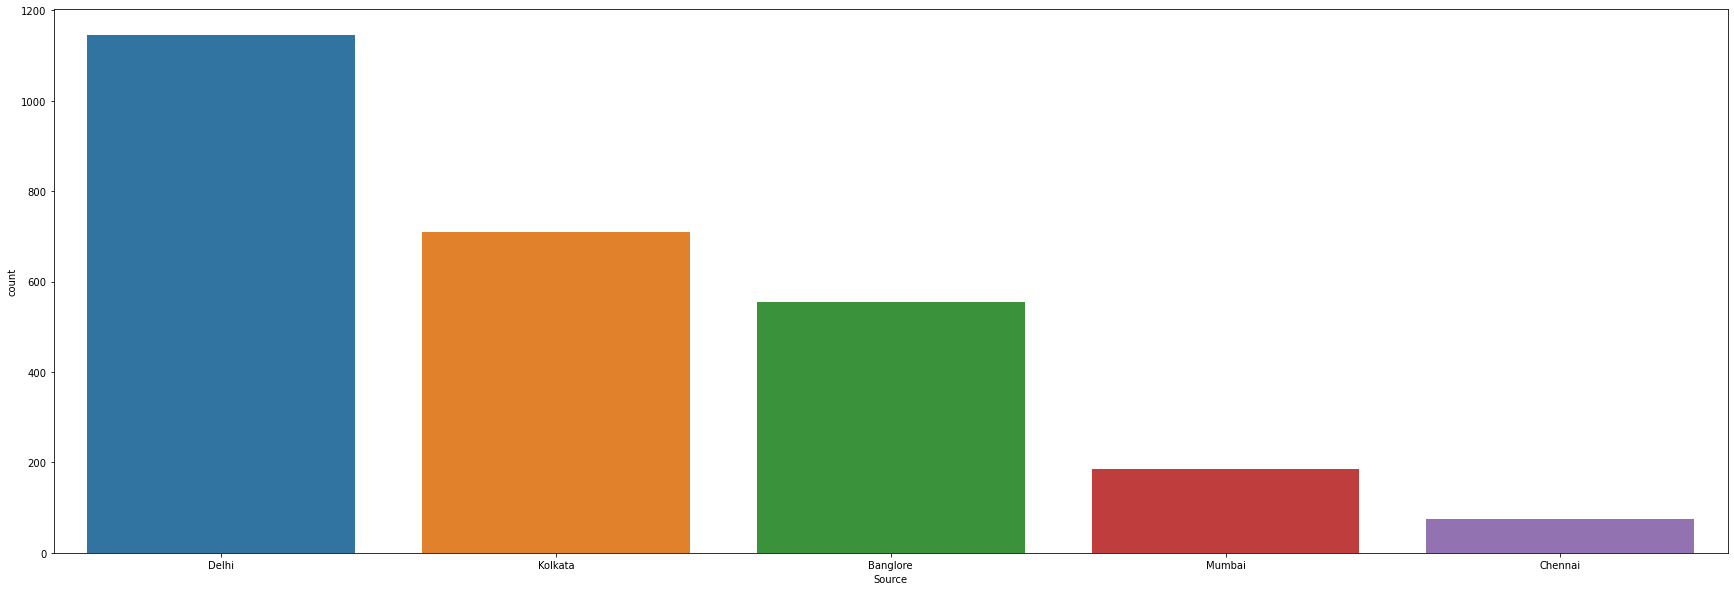

In [315]:
plt.figure(figsize=(30,10))
sns.countplot(ds_test['Source'])
print(ds_test['Source'].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


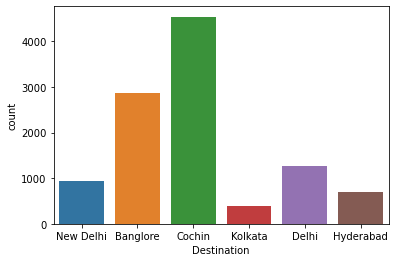

In [316]:
#below countplot shows the destination point of flight
sns.countplot(ds_train['Destination'])
print(ds_train['Destination'].value_counts())

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


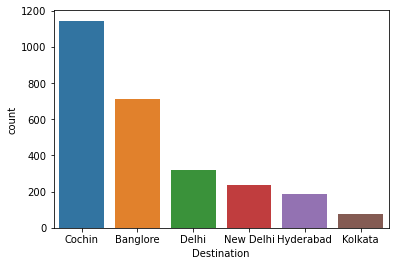

In [317]:
sns.countplot(ds_test['Destination'])
print(ds_test['Destination'].value_counts())

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


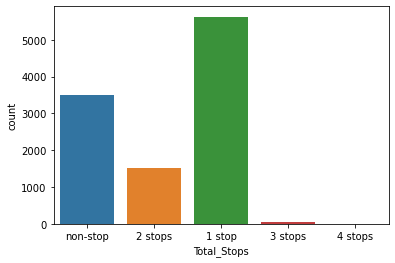

In [318]:
#below countplot shows the how many stops there during travelling
sns.countplot(ds_train['Total_Stops'])
print(ds_train['Total_Stops'].value_counts())

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


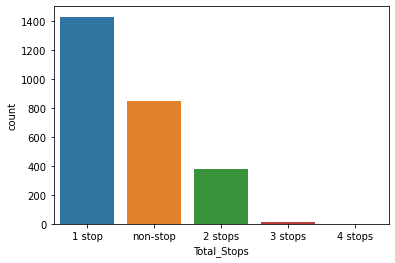

In [319]:
sns.countplot(ds_test['Total_Stops'])
print(ds_test['Total_Stops'].value_counts())

In [320]:
#total counts of routes thrugh which flight goes
print(ds_train['Route'].value_counts())


DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → RPR → VTZ → HYD                   1
CCU → IXB → DEL → BLR                   1
CCU → RPR → HYD → BLR                   1
BOM → GOI → HYD                         1
BLR → CCU → BBI → HYD → VGA → DEL       1
Name: Route, Length: 128, dtype: int64


In [321]:
print(ds_test['Route'].value_counts())

DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
BLR → VGA → DEL            1
BLR → NAG → DEL            1
BOM → IXC → DEL → HYD      1
CCU → PAT → BLR            1
CCU → AMD → BLR            1
Name: Route, Length: 100, dtype: int64


In [322]:
#departure time
ds_train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
12:05      1
12:45      1
22:25      1
21:35      1
16:25      1
Name: Dep_Time, Length: 222, dtype: int64

In [323]:
ds_test['Dep_Time'].value_counts()

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
00:25     1
23:00     1
13:50     1
15:40     1
17:55     1
Name: Dep_Time, Length: 199, dtype: int64

In [324]:
#flight arrival time
ds_train['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
13:20 13 Mar      1
02:20 25 Jun      1
18:30 07 May      1
19:50 10 Jun      1
10:40 02 Apr      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [325]:
ds_test['Arrival_Time'].value_counts()

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
10:00             1
20:45 25 May      1
00:25 22 Mar      1
09:15 13 Mar      1
00:05 25 May      1
Name: Arrival_Time, Length: 704, dtype: int64

In [326]:
ds_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [327]:
ds_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [328]:
#total duration time 
ds_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
33h 20m      1
41h 20m      1
5m           1
35h 35m      1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [329]:
ds_test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
27h 50m      1
27h 55m      1
32h 5m       1
4h 10m       1
21h 5m       1
Name: Duration, Length: 320, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Density'>

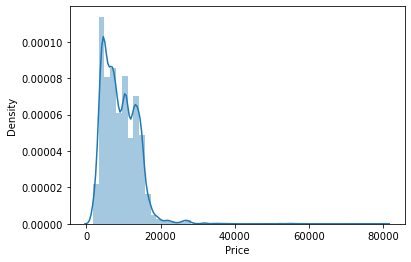

In [330]:
sns.distplot(ds_train['Price'])

distribution plot of price

derive date and month of flight from Date_of_Journey

In [331]:
ds_train["flight_date"] = pd.to_datetime(ds_train["Date_of_Journey"]).dt.day
ds_train["flight_month"] = pd.to_datetime(ds_train["Date_of_Journey"]).dt.month

In [332]:
ds_test["Flight_month"] = pd.to_datetime(ds_test["Date_of_Journey"]).dt.month
ds_test["Flight_day"] = pd.to_datetime(ds_test['Date_of_Journey']).dt.day

In [333]:
# derive Hours and minutes from departure time and arrival time for training data
ds_train["Dep_hour"] = pd.to_datetime(ds_train["Dep_Time"]).dt.hour
ds_train["Dep_min"] = pd.to_datetime(ds_train["Dep_Time"]).dt.minute

ds_train["ari_hr"] = pd.to_datetime(ds_train["Arrival_Time"]).dt.hour
ds_train["arriv_min"] = pd.to_datetime(ds_train["Arrival_Time"]).dt.minute

In [334]:
# Extracting Hours and minutes from departure time amd arrival time for testing data
ds_test["Dep_hour"] = pd.to_datetime(ds_test["Dep_Time"]).dt.hour
ds_test["Dep_min"] = pd.to_datetime(ds_test["Dep_Time"]).dt.minute
ds_test["ari_hr"] = pd.to_datetime(ds_test["Arrival_Time"]).dt.hour
ds_test["arriv_min"] = pd.to_datetime(ds_test["Arrival_Time"]).dt.minute

In [335]:
ds_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_date,flight_month,Dep_hour,Dep_min,ari_hr,arriv_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [336]:
ds_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Flight_month,Flight_day,Dep_hour,Dep_min,ari_hr,arriv_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55,2,45


Encode data using onehotencoder

In [337]:
dummies = pd.get_dummies(ds_train[['Source','Destination','Total_Stops']])

In [338]:
dummies.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [339]:
dummies.columns

Index(['Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops_1 stop', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop'],
      dtype='object')

In [340]:
dummies2 = pd.get_dummies(ds_test[['Source','Destination','Total_Stops']])

In [341]:
dummies2.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [342]:
ds_train._get_numeric_data()

,Price,flight_date,flight_month,Dep_hour,Dep_min,ari_hr,arriv_min
0,3897,24,3,22,20,1,10
1,7662,5,1,5,50,13,15
2,13882,6,9,9,25,4,25
3,6218,5,12,18,5,23,30
4,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25
10679,4145,27,4,20,45,23,20
10680,7229,27,4,8,20,11,20
10681,12648,3,1,11,30,14,10


In [343]:
ds_test._get_numeric_data()

,Flight_month,Flight_day,Dep_hour,Dep_min,ari_hr,arriv_min
0,6,6,17,30,4,25
1,12,5,6,20,10,20
2,5,21,19,15,19,0
3,5,21,8,0,21,0
4,6,24,23,55,2,45
...,...,...,...,...,...,...
2666,6,6,20,30,20,25
2667,3,27,14,20,16,55
2668,6,3,21,50,4,25
2669,6,3,4,0,19,15


In [345]:
#encode data using label encoder
ds_train['Airline']=le.fit_transform(ds_train['Airline'])
ds_test['Airline']=le.fit_transform(ds_test['Airline'])

In [346]:
ds_train['Airline']

0         3
1         1
2         4
3         3
4         3
         ..
10678     0
10679     1
10680     4
10681    10
10682     1
Name: Airline, Length: 10683, dtype: int32

create final dataframe of training data set

In [347]:
x = pd.concat([dummies, ds_train._get_numeric_data()], axis=1)  
x.head(2)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Total_Stops_4 stops,Total_Stops_non-stop,Airline,Price,flight_date,flight_month,Dep_hour,Dep_min,ari_hr,arriv_min
0,1,0,0,0,0,0,0,0,0,0,...,0,1,3,3897,24,3,22,20,1,10
1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,7662,5,1,5,50,13,15


In [348]:
#create final dataframe of testing data set
x2 = pd.concat([dummies2, ds_test._get_numeric_data()], axis=1)  
x2.head(2)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Airline,Flight_month,Flight_day,Dep_hour,Dep_min,ari_hr,arriv_min
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,4,6,6,17,30,4,25
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,3,12,5,6,20,10,20


In [129]:
x.shape

(10683, 24)

In [350]:
x2.shape

(2671, 23)

In [351]:

x.isnull().sum()


Source_Banglore          0
Source_Chennai           0
Source_Delhi             0
Source_Kolkata           0
Source_Mumbai            0
Destination_Banglore     0
Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_New Delhi    0
Total_Stops_1 stop       0
Total_Stops_2 stops      0
Total_Stops_3 stops      0
Total_Stops_4 stops      0
Total_Stops_non-stop     0
Airline                  0
Price                    0
flight_date              0
flight_month             0
Dep_hour                 0
Dep_min                  0
ari_hr                   0
arriv_min                0
dtype: int64

In [352]:
x2.isnull().sum()

Source_Banglore          0
Source_Chennai           0
Source_Delhi             0
Source_Kolkata           0
Source_Mumbai            0
Destination_Banglore     0
Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_New Delhi    0
Total_Stops_1 stop       0
Total_Stops_2 stops      0
Total_Stops_3 stops      0
Total_Stops_4 stops      0
Total_Stops_non-stop     0
Airline                  0
Flight_month             0
Flight_day               0
Dep_hour                 0
Dep_min                  0
ari_hr                   0
arriv_min                0
dtype: int64

In [353]:
#Stastical summary of training data
x.describe()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Total_Stops_4 stops,Total_Stops_non-stop,Airline,Price,flight_date,flight_month,Dep_hour,Dep_min,ari_hr,arriv_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.205654,0.035664,0.424693,0.268745,0.065244,0.268745,0.424693,0.118412,0.065244,0.035664,...,0.000094,0.326781,3.965927,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,0.404198,0.185460,0.494320,0.443328,0.246967,0.443328,0.494320,0.323111,0.246967,0.185460,...,0.009675,0.469058,2.352155,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,11.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


In [354]:
#Stastical summary of testing data
x2.describe()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Airline,Flight_month,Flight_day,Dep_hour,Dep_min,ari_hr,arriv_min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,...,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,0.207787,0.028079,0.428678,0.265818,0.069637,0.265818,0.428678,0.118682,0.069637,0.028079,...,0.004118,0.000374,0.317858,3.972669,5.607263,12.026956,12.603519,24.891426,13.585174,24.558218
std,0.405800,0.165231,0.494980,0.441851,0.254582,0.441851,0.494980,0.323475,0.254582,0.165231,...,0.064054,0.019349,0.465731,2.295657,3.042952,8.564408,5.686673,19.086522,7.040396,16.775436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,5.000000,6.000000,12.000000,25.000000,15.000000,25.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,6.000000,21.000000,18.000000,45.000000,19.000000,35.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,10.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


In [355]:
#corelation
x.corr()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Total_Stops_4 stops,Total_Stops_non-stop,Airline,Price,flight_date,flight_month,Dep_hour,Dep_min,ari_hr,arriv_min
Source_Banglore,1.000000,-0.097851,-0.437171,-0.308460,-0.134426,-0.308460,-0.437171,0.720282,-0.134426,-0.097851,...,0.019016,0.411837,-0.013208,-0.118026,-0.059451,-0.063098,-0.007858,0.077296,-0.024388,0.090991
Source_Chennai,-0.097851,1.000000,-0.165230,-0.116584,-0.050807,-0.116584,-0.165230,-0.070480,-0.050807,1.000000,...,-0.001861,0.276027,0.113949,-0.179216,0.012217,-0.014995,-0.014835,0.067086,-0.014783,-0.030493
Source_Delhi,-0.437171,-0.165230,1.000000,-0.520863,-0.226991,-0.520863,1.000000,-0.314886,-0.226991,-0.165230,...,-0.008313,-0.512603,-0.017102,0.270619,0.111986,0.008033,-0.118836,-0.085405,-0.006859,-0.209867
Source_Kolkata,-0.308460,-0.116584,-0.520863,1.000000,-0.160161,1.000000,-0.520863,-0.222178,-0.160161,-0.116584,...,-0.005866,-0.096425,-0.021113,0.009377,-0.068327,0.063591,0.155500,-0.024298,0.054727,0.118570
Source_Mumbai,-0.134426,-0.050807,-0.226991,-0.160161,1.000000,-0.160161,-0.226991,-0.096825,1.000000,-0.050807,...,-0.002556,0.317784,0.008178,-0.230745,-0.013369,-0.015700,-0.017277,0.037675,-0.033495,0.081196
Destination_Banglore,-0.308460,-0.116584,-0.520863,1.000000,-0.160161,1.000000,-0.520863,-0.222178,-0.160161,-0.116584,...,-0.005866,-0.096425,-0.021113,0.009377,-0.068327,0.063591,0.155500,-0.024298,0.054727,0.118570
Destination_Cochin,-0.437171,-0.165230,1.000000,-0.520863,-0.226991,-0.520863,1.000000,-0.314886,-0.226991,-0.165230,...,-0.008313,-0.512603,-0.017102,0.270619,0.111986,0.008033,-0.118836,-0.085405,-0.006859,-0.209867
Destination_Delhi,0.720282,-0.070480,-0.314886,-0.222178,-0.096825,-0.222178,-0.314886,1.000000,-0.096825,-0.070480,...,-0.003546,0.526036,0.029082,-0.313401,0.011519,0.008875,0.009489,0.003162,-0.030844,0.095249
Destination_Hyderabad,-0.134426,-0.050807,-0.226991,-0.160161,1.000000,-0.160161,-0.226991,-0.096825,1.000000,-0.050807,...,-0.002556,0.317784,0.008178,-0.230745,-0.013369,-0.015700,-0.017277,0.037675,-0.033495,0.081196
Destination_Kolkata,-0.097851,1.000000,-0.165230,-0.116584,-0.050807,-0.116584,-0.165230,-0.070480,-0.050807,1.000000,...,-0.001861,0.276027,0.113949,-0.179216,0.012217,-0.014995,-0.014835,0.067086,-0.014783,-0.030493


<AxesSubplot:>

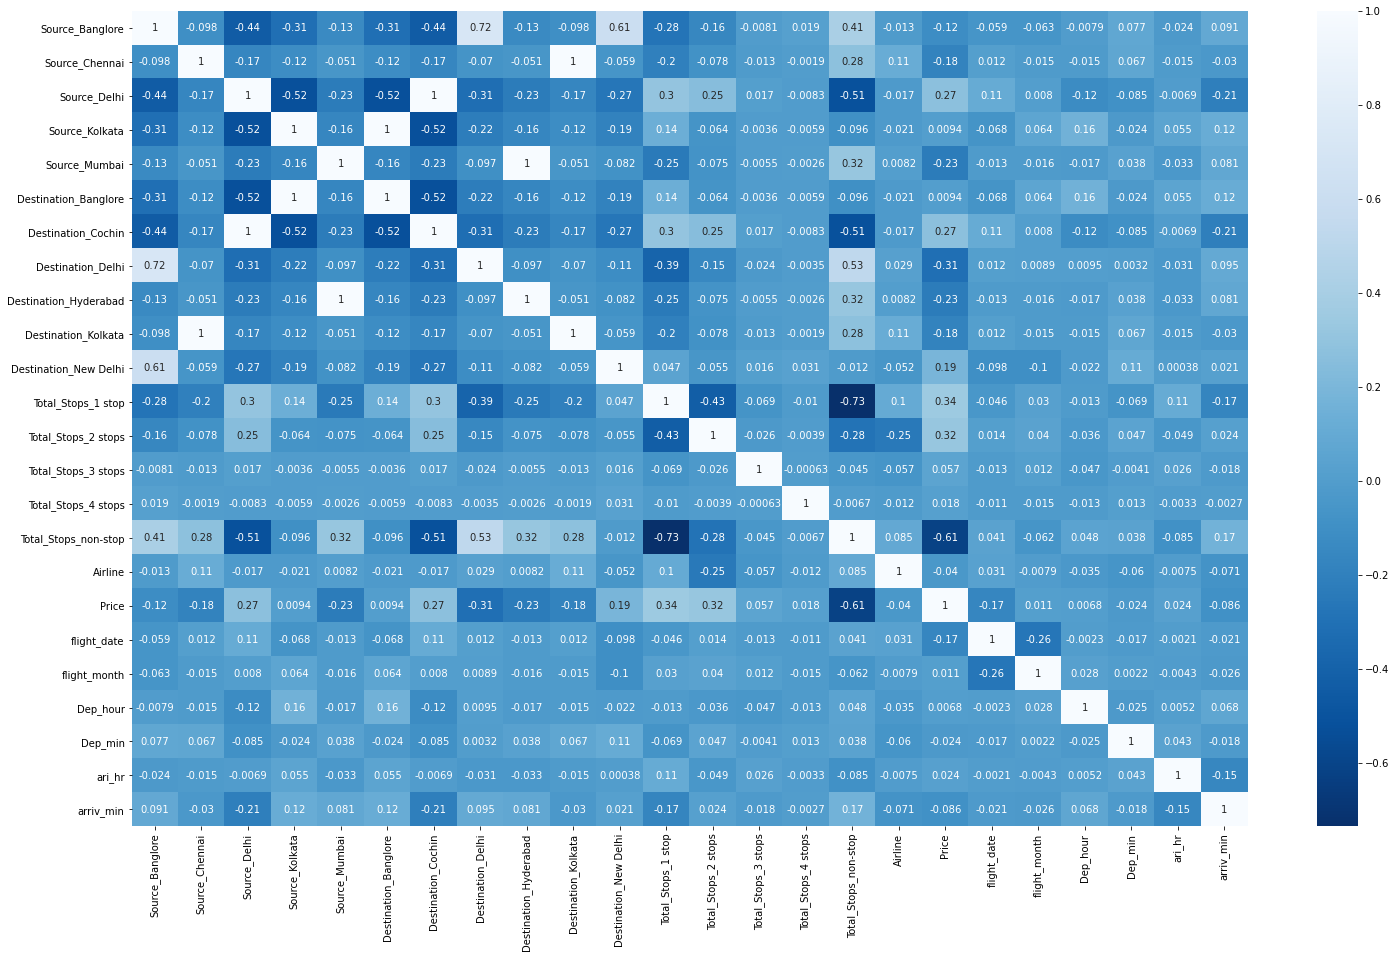

In [358]:
plt.figure(figsize=(25,15))
sns.heatmap(x.corr(),annot=True,cmap='Blues_r')


In [ ]:
above heatmap shows the corelation between target variable and input features

In [356]:
#corelation og testing data
x2.corr()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Airline,Flight_month,Flight_day,Dep_hour,Dep_min,ari_hr,arriv_min
Source_Banglore,1.000000,-0.087050,-0.443623,-0.308162,-0.140114,-0.308162,-0.443623,0.716536,-0.140114,-0.087050,...,-0.018525,0.037788,0.421290,0.000068,-0.074926,-0.007647,0.019321,0.074964,-0.003641,0.132328
Source_Chennai,-0.087050,1.000000,-0.147233,-0.102275,-0.046502,-0.102275,-0.147233,-0.062374,-0.046502,1.000000,...,-0.010930,-0.003289,0.249000,0.121499,0.030135,0.011904,-0.010867,0.079943,0.006153,-0.052274
Source_Delhi,-0.443623,-0.147233,1.000000,-0.521214,-0.236984,-0.521214,1.000000,-0.317872,-0.236984,-0.147233,...,0.015174,-0.016764,-0.511687,0.003063,0.020809,0.066892,-0.167791,-0.063457,-0.015264,-0.233382
Source_Kolkata,-0.308162,-0.102275,-0.521214,1.000000,-0.164620,1.000000,-0.521214,-0.220809,-0.164620,-0.102275,...,0.014239,-0.011645,-0.097698,-0.060036,0.058732,-0.064940,0.166871,-0.048981,0.036062,0.117665
Source_Mumbai,-0.140114,-0.046502,-0.236984,-0.164620,1.000000,-0.164620,-0.236984,-0.100397,1.000000,-0.046502,...,-0.017593,-0.005295,0.331293,0.019279,-0.042521,-0.012886,0.012869,0.037013,-0.031102,0.072541
Destination_Banglore,-0.308162,-0.102275,-0.521214,1.000000,-0.164620,1.000000,-0.521214,-0.220809,-0.164620,-0.102275,...,0.014239,-0.011645,-0.097698,-0.060036,0.058732,-0.064940,0.166871,-0.048981,0.036062,0.117665
Destination_Cochin,-0.443623,-0.147233,1.000000,-0.521214,-0.236984,-0.521214,1.000000,-0.317872,-0.236984,-0.147233,...,0.015174,-0.016764,-0.511687,0.003063,0.020809,0.066892,-0.167791,-0.063457,-0.015264,-0.233382
Destination_Delhi,0.716536,-0.062374,-0.317872,-0.220809,-0.100397,-0.220809,-0.317872,1.000000,-0.100397,-0.062374,...,-0.023598,-0.007102,0.537585,0.048753,-0.004377,0.050488,0.031698,-0.023997,-0.028204,0.122859
Destination_Hyderabad,-0.140114,-0.046502,-0.236984,-0.164620,1.000000,-0.164620,-0.236984,-0.100397,1.000000,-0.046502,...,-0.017593,-0.005295,0.331293,0.019279,-0.042521,-0.012886,0.012869,0.037013,-0.031102,0.072541
Destination_Kolkata,-0.087050,1.000000,-0.147233,-0.102275,-0.046502,-0.102275,-0.147233,-0.062374,-0.046502,1.000000,...,-0.010930,-0.003289,0.249000,0.121499,0.030135,0.011904,-0.010867,0.079943,0.006153,-0.052274


<AxesSubplot:>

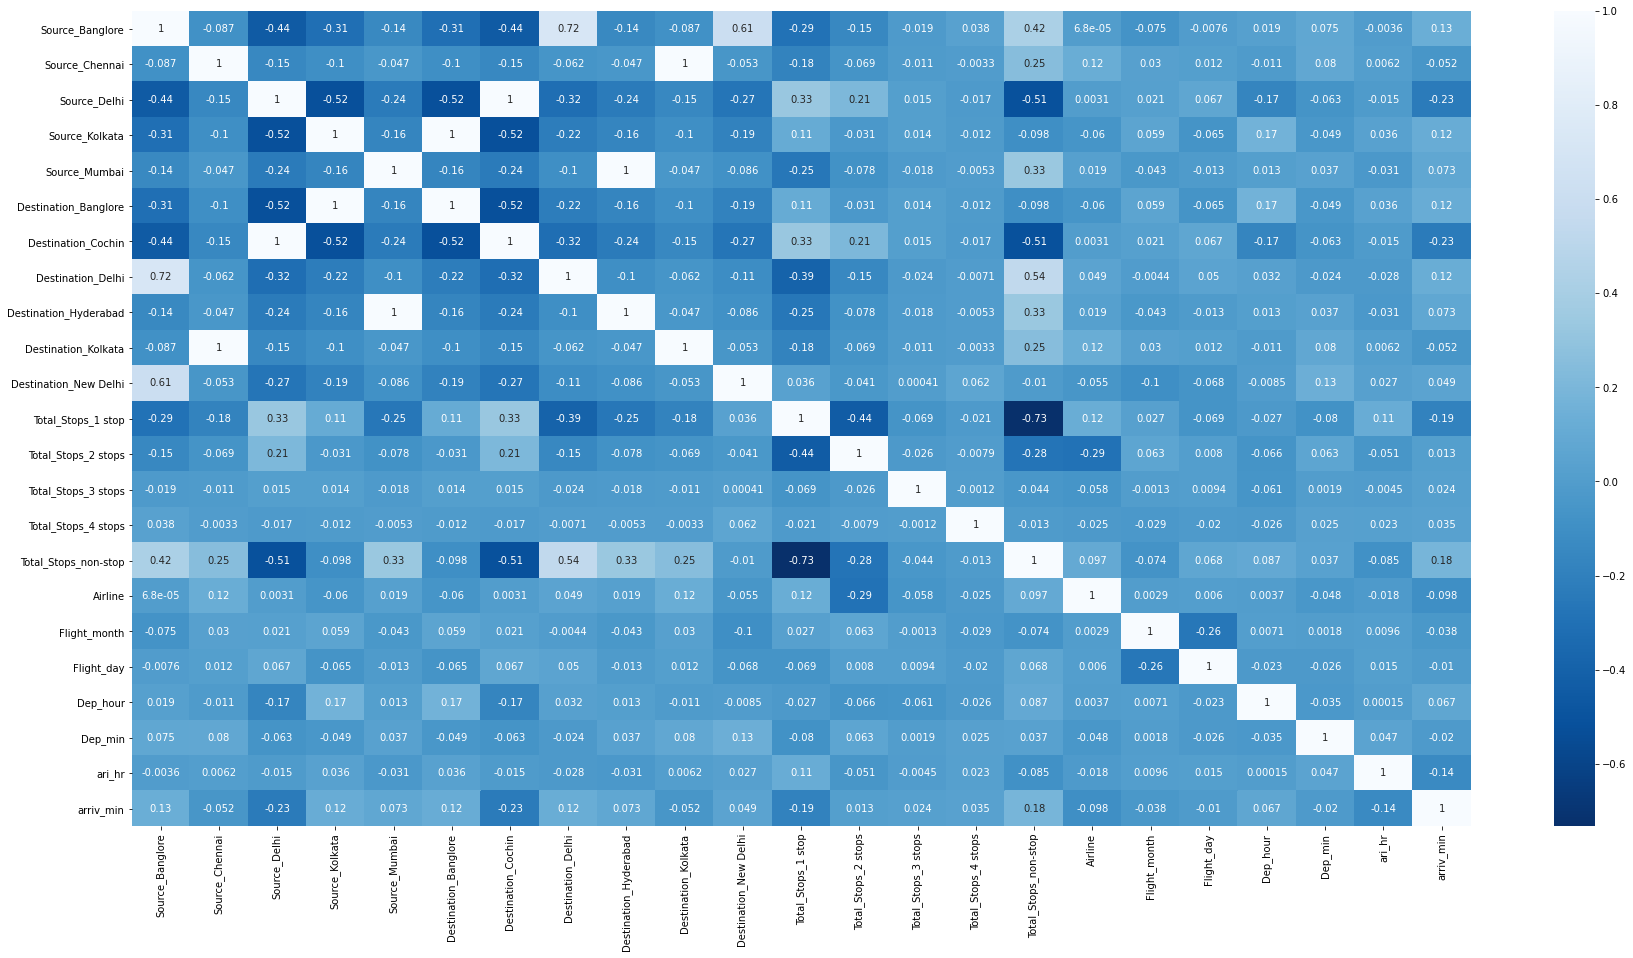

In [357]:
plt.figure(figsize=(30,15))
sns.heatmap(x2.corr(),annot=True,cmap='Blues_r')

above heatmap shows the corelation between different input feauters

In [395]:
x.skew()

Source_Banglore            1.456720
Source_Chennai             5.008333
Source_Delhi               0.304745
Source_Kolkata             1.043466
Source_Mumbai              3.521420
Destination_Banglore       1.043466
Destination_Cochin         0.304745
Destination_Delhi          2.362402
Destination_Hyderabad      3.521420
Destination_Kolkata        5.008333
Destination_New Delhi      2.925821
Total_Stops_1 stop        -0.106691
Total_Stops_2 stops        2.048256
Total_Stops_3 stops       15.312416
Total_Stops_4 stops      103.358599
Total_Stops_non-stop       0.738721
Airline                    0.731095
Price                      1.812552
flight_date                0.367373
flight_month               0.629540
Dep_hour                   0.113073
Dep_min                    0.167029
ari_hr                    -0.369988
arriv_min                  0.110945
dtype: float64

In [396]:
x2.skew()

Source_Banglore           1.441261
Source_Chennai            5.716548
Source_Delhi              0.288396
Source_Kolkata            1.060800
Source_Mumbai             3.383478
Destination_Banglore      1.060800
Destination_Cochin        0.288396
Destination_Delhi         2.359403
Destination_Hyderabad     3.383478
Destination_Kolkata       5.716548
Destination_New Delhi     2.886151
Total_Stops_1 stop       -0.143465
Total_Stops_2 stops       2.053677
Total_Stops_3 stops      15.494901
Total_Stops_4 stops      51.681718
Total_Stops_non-stop      0.782760
Airline                   0.483882
Flight_month              0.590701
Flight_day                0.478246
Dep_hour                  0.093759
Dep_min                   0.128515
ari_hr                   -0.443166
arriv_min                 0.115267
dtype: float64

In [376]:
#import  regression algorithm libaries and accuracy_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [375]:
#divide data into input and target
x_2=x.drop("Price",axis=1)
y=x['Price']

In [390]:
#split training data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x_2,y,test_size=.25,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (8012, 23)
x_test shape (2671, 23)
y_train shape (8012,)
y_test shape (2671,)


In [391]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rf=RandomForestRegressor()
svr=SVR()


In [392]:
#fit data into models and predict the values
list1=[lr,dtr,rf,svr]
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_scores",i)
    print("r2_score",r2_score(y_test,pred))
    print("mean_squared_error",mean_squared_error(y_test,pred))
    print("mean_absolute_error",mean_absolute_error(y_test,pred))

accuracy_scores LinearRegression()
r2_score 0.4816178808310322
mean_squared_error 10589185.911242131
mean_absolute_error 2367.2264133283416
accuracy_scores DecisionTreeRegressor()
r2_score 0.6606060985349456
mean_squared_error 6932926.478090603
mean_absolute_error 1390.4182328715835
accuracy_scores RandomForestRegressor()
r2_score 0.8107886678643877
mean_squared_error 3865090.8247178653
mean_absolute_error 1190.2664252933407
accuracy_scores SVR()
r2_score -0.019457504312105467
mean_squared_error 20824840.677525535
mean_absolute_error 3583.592627287833


by observig r2_score, randomforestis good model

In [393]:
#cross val scores
for i in list1:
    scores=cross_val_score(i,x1,y,cv=5)
    print("cross_scores",i)
    print(scores)
    print(scores.mean())

cross_scores LinearRegression()
[ 4.61818202e-01  4.60105318e-01  4.73673327e-01  4.72402094e-01
 -3.34729817e+18]
-6.694596341036407e+17
cross_scores DecisionTreeRegressor()
[0.66977692 0.73200736 0.76149421 0.63154318 0.58291555]
0.6755474423511563
cross_scores RandomForestRegressor()
[0.81396881 0.80607149 0.82562624 0.79616732 0.75806793]
0.7999803580573082
cross_scores SVR()
[-0.02177176 -0.03620969 -0.01152602 -0.00691454 -0.02355732]
-0.019995864913191587


# HyperParameterTunning

In [394]:

from sklearn.model_selection import GridSearchCV
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [397]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 20}

In [398]:
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor(bootstrap=False,max_features= 'sqrt',min_samples_split=8,n_estimators=20)
rf1.fit(x_train,y_train)
rpred=rf1.predict(x_test)
cv3=cross_val_score(rf1,x_train,y_train,cv=5)
print("score",cv3)
print("cross score mean value",cv3.mean())
print('mean squared error',mean_squared_error(rpred,y_test))
print("r2_score",r2_score(y_test,rpred))

score [0.83893127 0.81577465 0.76849133 0.72470333 0.80626882]
cross score mean value 0.7908338813718824
mean squared error 3725956.4008343536
r2_score 0.8175998427844084


In [399]:
import joblib

In [400]:
joblib.dump(rf1,'Flight.obj')

['Flight.obj']

In [401]:
f1=joblib.load("Flight.obj")

In [402]:
#predicting test data
f1.predict(x2)

array([10842.00166667,  4316.04166667, 12940.79714286, ...,
       13563.5672619 ,  9046.30595238,  7807.91333333])